## Ejercicio ML - Regresión - Precio Coches

En este ejercicio vamos a usar los datasets **`precio_coches_train.csv`** y **`precio_coches_test.csv`** que contiene los siguientes datos:

- **Precio**: float.
- **Combustible**: string.
- **Año**: int.
- **Km**: int.
- **CV**: int.
- **Provincia**: string.
- **Marca**: string.

El objetivo es entrenar un modelo de regresión que pueda predecir la columna de precio.

Para entrenar el modelo solo vamos a usar los datos de **`precio_coches_train.csv`**. Prueba con diferentes modelos y diferentes parámetros.

Después de tener el modelo entrenado vamos a hacer pruebas con **`precio_coches_test.csv`** y calcular las métricas para regresiones. Haz un DataFrame con estos resultados.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Modelos de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

# Métricas para Regresión
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as gbr

In [79]:
df = pd.read_csv("../Data/precio_coches_train.csv")
df_test = pd.read_csv("../Data/precio_coches_test.csv")

df

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,7999,Diésel,1993,293234,115.0,Zaragoza,NISSAN
1,10990,Gasolina,1993,187000,320.0,Valencia,MERCEDES-BENZ
2,5990,Gasolina,1993,80000,145.0,Madrid,MITSUBISHI
3,79000,Gasolina,1993,169000,250.0,Barcelona,PORSCHE
4,4950,Gasolina,1993,250000,109.0,Ávila,MERCEDES-BENZ
...,...,...,...,...,...,...,...
99299,528000,Gasolina,2023,270,700.0,Murcia,ASTON
99300,194000,Gasolina,2023,60,535.0,Murcia,ASTON
99301,34900,Gasolina,2023,50,155.0,Vizcaya,FORD
99302,219000,Gasolina,2023,90,535.0,Murcia,ASTON


In [80]:
df_test

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,139900,Gasolina,2020,37900,600,Madrid,AUDI
1,49900,Diésel,2022,31000,190,Madrid,BMW
2,27250,Diésel,2021,34236,120,Madrid,FORD
3,6900,Gasolina,2010,90000,69,Jaén,TOYOTA
4,27495,Híbrido,2022,27202,122,Valencia,TOYOTA
...,...,...,...,...,...,...,...
772,7990,Diésel,2017,135772,75,Madrid,OPEL
773,26490,Eléctrico,2020,94622,136,Madrid,HYUNDAI
774,8490,Diésel,2013,215411,115,Madrid,HYUNDAI
775,8790,Diésel,2017,117618,75,Madrid,OPEL


### EDA 

In [81]:
backup = df.copy()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99304 entries, 0 to 99303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       99304 non-null  int64  
 1   Combustible  99304 non-null  object 
 2   Año          99304 non-null  int64  
 3   Km           99304 non-null  int64  
 4   CV           99044 non-null  float64
 5   Provincia    99044 non-null  object 
 6   Marca        99304 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [83]:
df.describe()

,Precio,Año,Km,CV
count,9.930400e+04,99304.000000,9.930400e+04,99044.000000
mean,3.406245e+04,2017.899299,7.292484e+04,166.660525
std,9.776664e+04,4.397941,6.402247e+04,270.486904
min,1.000000e+00,1993.000000,0.000000e+00,1.000000
25%,1.549900e+04,2017.000000,2.400000e+04,110.000000
50%,2.190000e+04,2019.000000,5.991900e+04,130.000000
75%,3.080000e+04,2021.000000,1.051770e+05,177.000000
max,6.800000e+06,2023.000000,3.280000e+06,63824.000000


In [84]:
df.sort_values('CV', ascending=False)

,Precio,Combustible,Año,Km,CV,Provincia,Marca
31535,49990,Gasolina,2006,129000,63824.0,Valencia,PORSCHE
12130,23900,Diésel,2017,67254,17500.0,Madrid,RENAULT
63683,26900,Gasolina,2021,46000,16000.0,Madrid,RENAULT
46716,14900,Gasolina,2000,196000,14900.0,Málaga,PORSCHE
58273,24500,Gasolina,2022,25000,14500.0,Madrid,RENAULT
...,...,...,...,...,...,...,...
94256,555000,Gasolina,2020,1150,NaN,NaN,McLaren
94330,99900,Gasolina,2020,15900,NaN,NaN,KTM
94535,63000,Gasolina,2020,8000,NaN,NaN,DODGE
94683,325000,Gasolina,2020,3800,NaN,NaN,McLaren


In [85]:
df.sort_values('CV')

,Precio,Combustible,Año,Km,CV,Provincia,Marca
92249,24500,Gasolina,2022,5,1.0,Granada,FIAT
92214,31500,Híbrido,2022,3577,1.0,Málaga,SUZUKI
92018,31500,Híbrido,2022,3577,1.0,Almería,SUZUKI
92002,31500,Híbrido,2022,3577,1.0,Granada,SUZUKI
98550,24500,Gasolina,2022,5,1.0,Málaga,FIAT
...,...,...,...,...,...,...,...
94256,555000,Gasolina,2020,1150,NaN,NaN,McLaren
94330,99900,Gasolina,2020,15900,NaN,NaN,KTM
94535,63000,Gasolina,2020,8000,NaN,NaN,DODGE
94683,325000,Gasolina,2020,3800,NaN,NaN,McLaren


### Filtro de posibles errores
El coche más potente del mercado está en aproximadamente 2200 CV, por lo tanto vamos ha filtrar todos los coches, que superen esta cantidad.

https://www.lavanguardia.com/motor/20220419/8205440/ranking-bestial-cuales-son-10-super-coches-mas-potentes-planeta-pmv.html

Y si miramos por abajo vemos que los coches del mercado actual con menos caballos están alrededor de los 60 CV, por lo que vamos a tratar los datos con valores menores a estos como datos erroneos también.

https://www.autobild.es/reportajes/los-cinco-coches-con-menos-potencia-250967

In [86]:
df = df[(df.CV > 55) & (df.CV < 2200)]

#### Columna precio

In [87]:
df[df.Precio < 450]

,Precio,Combustible,Año,Km,CV,Provincia,Marca
39603,1,Diésel,2008,111,105.0,Valencia,AUDI


In [88]:
df = df[df.Precio > 450]

El precio medio está en 3200 aprox y el percentil 25 en 1500, vamos a presuponer que todos los coches que tienen un precio inferior a 450 es por una errata y su valor no es correcto.

### Columna Km

In [89]:
df.sort_values('Km', ascending=False)

,Precio,Combustible,Año,Km,CV,Provincia,Marca
911,10999,Diésel,2010,3280000,272.0,Salamanca,LAND-ROVER
31446,7900,Diésel,2006,2396000,122.0,Córdoba,BMW
25,3995,Gasolina,1997,1991050,170.0,Vizcaya,VOLVO
27024,30990,Diésel,2017,1216700,258.0,Madrid,BMW
32384,5990,Gasolina,2012,1210000,86.0,Vizcaya,CHEVROLET
...,...,...,...,...,...,...,...
79732,21990,Gasolina,2023,0,110.0,Córdoba,OPEL
79731,34990,Eléctrico,2023,0,136.0,Córdoba,PEUGEOT
79724,27500,Híbrido,2023,0,125.0,Vizcaya,FORD
79714,17990,Gasolina,2023,0,91.0,Cádiz,DACIA


In [90]:
df = df[df.Km < 1e6]

Filtramos los coches con menos de 1 millón de Km, ya que no hay manera de demostrar que un coche tiene más de 1 millón de Km, ya que el valor máximo del cuenta Km de un coche es de 999999

### Filtrado de valores nulos 

In [91]:
df = df.dropna()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98891 entries, 0 to 99303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       98891 non-null  int64  
 1   Combustible  98891 non-null  object 
 2   Año          98891 non-null  int64  
 3   Km           98891 non-null  int64  
 4   CV           98891 non-null  float64
 5   Provincia    98891 non-null  object 
 6   Marca        98891 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.0+ MB


In [93]:
df.describe()

,Precio,Año,Km,CV
count,9.889100e+04,98891.000000,98891.000000,98891.000000
mean,3.331486e+04,2017.919851,72854.483148,164.431880
std,8.728422e+04,4.362459,62078.107356,105.201084
min,5.000000e+02,1993.000000,0.000000,56.000000
25%,1.550000e+04,2017.000000,24064.000000,110.000000
50%,2.190000e+04,2019.000000,59960.000000,130.000000
75%,3.061000e+04,2021.000000,105205.000000,177.000000
max,6.800000e+06,2023.000000,990000.000000,1509.000000


### Tratamiento de variables categóricas

#### Target encoding

Vamos a usar la técnica del target encoding que consiste en condificar las variables categóricas en base al valor que tiene la variable objetivo dentro de ciertas agrupaciones.

In [94]:
combustible = df.groupby('Combustible').agg({'Precio':'mean'})
combustible.reset_index(inplace=True)

In [95]:
combustible

,Combustible,Precio
0,Diésel,23961.114223
1,Eléctrico,46207.736378
2,Gas,14602.076316
3,Gasolina,40958.190405
4,Híbrido,30698.108430
5,Híbrido Enchufable,89832.948675


In [23]:
combustible_dict = dict(zip(combustible['Combustible'],combustible['Precio']))

In [24]:
df['Combustible_cod'] = df.Combustible.apply(lambda x: combustible_dict[x])

In [25]:
marca =  df.groupby('Marca').agg({'Precio':'mean'})
marca.reset_index(inplace=True)
marca_dict = dict(zip(marca['Marca'],marca['Precio']))
df['Marca_cod'] = df.Marca.apply(lambda x: marca_dict[x])

In [26]:
provincia =  df.groupby('Provincia').agg({'Precio':'mean'})
provincia.reset_index(inplace=True)
provincia_dict = dict(zip(provincia['Provincia'],provincia['Precio']))
df['Provincia_cod'] = df.Provincia.apply(lambda x: provincia_dict[x])
df

,Precio,Combustible,Año,Km,CV,Provincia,Marca,Combustible_cod,Marca_cod,Provincia_cod
0,7999,Diésel,1993,293234,115.0,Zaragoza,NISSAN,23961.114223,20027.525312,28399.035279
1,10990,Gasolina,1993,187000,320.0,Valencia,MERCEDES-BENZ,40958.190405,47184.036113,25061.052960
2,5990,Gasolina,1993,80000,145.0,Madrid,MITSUBISHI,40958.190405,19602.978560,38346.026831
3,79000,Gasolina,1993,169000,250.0,Barcelona,PORSCHE,40958.190405,123233.331606,30444.538273
4,4950,Gasolina,1993,250000,109.0,Ávila,MERCEDES-BENZ,40958.190405,47184.036113,21469.610706
...,...,...,...,...,...,...,...,...,...,...
99299,528000,Gasolina,2023,270,700.0,Murcia,ASTON,40958.190405,330939.350962,136918.425035
99300,194000,Gasolina,2023,60,535.0,Murcia,ASTON,40958.190405,330939.350962,136918.425035
99301,34900,Gasolina,2023,50,155.0,Vizcaya,FORD,40958.190405,21122.481371,25862.636628
99302,219000,Gasolina,2023,90,535.0,Murcia,ASTON,40958.190405,330939.350962,136918.425035


In [30]:
df = df.drop(['Combustible_cod', 'Marca_cod', 'Provincia_cod'], axis=1)

In [31]:
def transformaciones_col_categ(df:pd.DataFrame, df_test, cols:list, target:str):
    for c in cols:
        dictio = df.groupby(c).agg({target:'mean'})
        dictio.reset_index(inplace=True)
        dictio = dict(zip(dictio[c],dictio[target]))
        df[c] = df[c].apply(lambda x: dictio[x])
        df_test[c] = df_test[c].apply(lambda x: dictio[x])
        
        
    return df, df_test

In [32]:
df1, df_test = transformaciones_col_categ(df, df_test, ['Combustible', 'Provincia', 'Marca'], 'Precio')
df1

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,7999,23961.114223,1993,293234,115.0,28399.035279,20027.525312
1,10990,40958.190405,1993,187000,320.0,25061.052960,47184.036113
2,5990,40958.190405,1993,80000,145.0,38346.026831,19602.978560
3,79000,40958.190405,1993,169000,250.0,30444.538273,123233.331606
4,4950,40958.190405,1993,250000,109.0,21469.610706,47184.036113
...,...,...,...,...,...,...,...
99299,528000,40958.190405,2023,270,700.0,136918.425035,330939.350962
99300,194000,40958.190405,2023,60,535.0,136918.425035,330939.350962
99301,34900,40958.190405,2023,50,155.0,25862.636628,21122.481371
99302,219000,40958.190405,2023,90,535.0,136918.425035,330939.350962


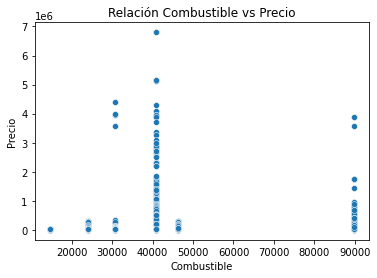

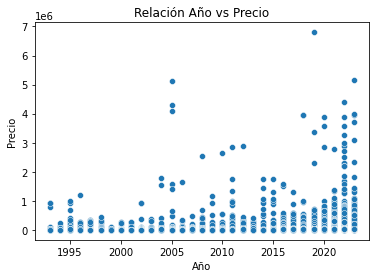

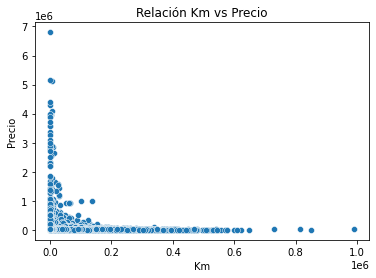

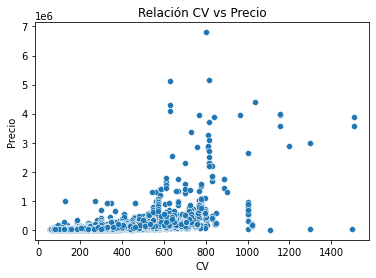

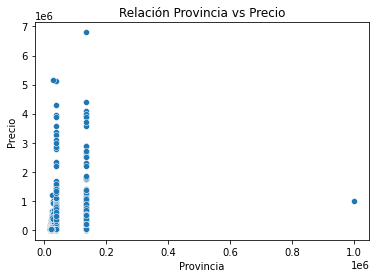

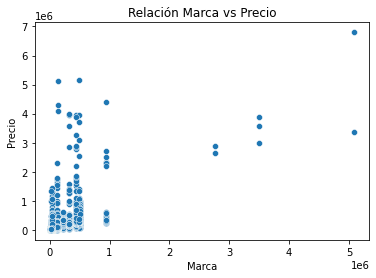

In [36]:
for col in df1.columns[1:]:
    sns.scatterplot(data=df1, x=col, y='Precio')
    plt.title(f'Relación {col} vs Precio')
    plt.show();

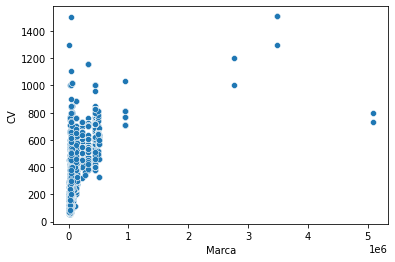

In [73]:
sns.scatterplot(data=df1, x='Marca', y='CV');

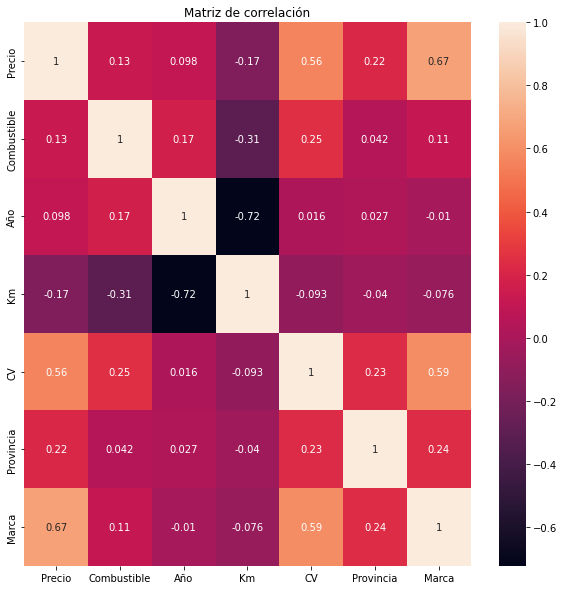

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)
plt.title('Matriz de correlación')
plt.show();

In [39]:
df_test

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,139900,40958.190405,2020,37900,600,38346.026831,33761.818652
1,49900,23961.114223,2022,31000,190,38346.026831,36199.466363
2,27250,23961.114223,2021,34236,120,38346.026831,21122.481371
3,6900,40958.190405,2010,90000,69,21016.691574,23035.082015
4,27495,30698.108430,2022,27202,122,25061.052960,23035.082015
...,...,...,...,...,...,...,...
772,7990,23961.114223,2017,135772,75,38346.026831,16721.078994
773,26490,46207.736378,2020,94622,136,38346.026831,19753.125766
774,8490,23961.114223,2013,215411,115,38346.026831,19753.125766
775,8790,23961.114223,2017,117618,75,38346.026831,16721.078994


### Prueba del modelo

In [40]:
X = df1.drop('Precio', axis=1)
y = df.Precio

In [41]:
lr = LinearRegression()
rf = rfr(250, max_depth=4, bootstrap=True, min_samples_leaf=2, n_jobs=-1)
gb = gbr(learning_rate=0.05, n_estimators=250, max_depth=4)

In [42]:
lr.fit(X,y)
rf.fit(X,y)
gb.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=250)

In [43]:
pred_lr = lr.predict(df_test.drop('Precio', axis=1))
pred_rf = rf.predict(df_test.drop('Precio', axis=1))
pred_gb = gb.predict(df_test.drop('Precio', axis=1))

In [56]:
def adjr2(modelo, X_test, y_test):
    """ R2 Score """
    return 1 - (1 - modelo.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [50]:
print(f'Linear regresion MAE: {mean_absolute_error(df_test["Precio"], pred_lr)}')
print(f'Random forest MAE: {mean_absolute_error(df_test["Precio"], pred_rf)}')
print(f'Gradient Boost MAE: {mean_absolute_error(df_test["Precio"], pred_gb)}')

Linear regresion MAE: 8668.272772303791
Random forest MAE: 7165.250645705611
Gradient Boost MAE: 3411.0964950826015


In [51]:
print(f'Linear regresion RMSE: {mean_squared_error(df_test["Precio"], pred_lr, squared=False)}')
print(f'Random forest RMSE: {mean_squared_error(df_test["Precio"], pred_rf, squared=False)}')
print(f'Gradient Boost RMSE:{mean_squared_error(df_test["Precio"], pred_gb, squared=False)}')

Linear regresion RMSE: 15968.882947555154
Random forest RMSE: 12274.071002829782
Gradient Boost RMSE:6465.243389672572


In [62]:
print(f"R2 Linear regresion: {r2_score(df_test['Precio'], pred_lr)}")
print(f"R2 Random forest: {r2_score(df_test['Precio'], pred_rf)}")
print(f"R2 Gradient Boost: {r2_score(df_test['Precio'], pred_gb)}")

R2 Linear regresion: 0.20055553991642272
R2 Random forest: 0.5277015885909997
R2 Gradient Boost: 0.8689584624552624


In [64]:
print(f'R2 ajustado linear regresion: {adjr2(lr, df_test.drop("Precio", axis=1), df_test["Precio"])}')
print(f'R2 ajustado Random Forest: {adjr2(rf, df_test.drop("Precio", axis=1), df_test["Precio"])}')
print(f'R2 ajustado Gradient Boost: {adjr2(gb, df_test.drop("Precio", axis=1), df_test["Precio"])}')

R2 ajustado linear regresion: 0.19432610256512206
R2 ajustado Random Forest: 0.524021341229371
R2 ajustado Gradient Boost: 0.8679373595653035


In [65]:
features = pd.DataFrame(dict(zip(gb.feature_names_in_,gb.feature_importances_)), index=[0]).T
features.reset_index(inplace=True)
features.columns = ['Feature', 'Value']
features = features.sort_values('Value', ascending=False)


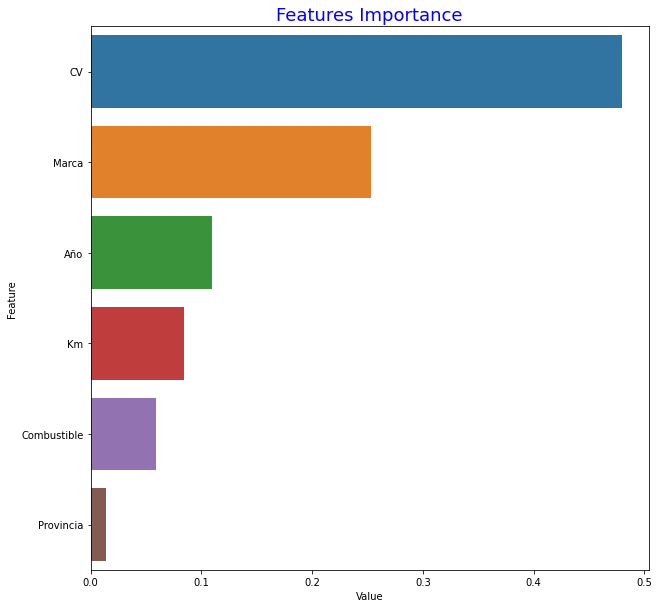

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data=features, y='Feature', x='Value')
plt.title('Features Importance', color='b', fontsize=18)
plt.show();